In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import lucem_illud_2020 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics
import pickle
%matplotlib inline

In [2]:
namedf=pd.read_excel('/home/lkcao/content-final/cleaned.xlsx',Sheet='sheet1')
sodf=pd.read_csv("sepsoap.txt",encoding='utf-8',sep='\t')

In [7]:
lovedf=pd.DataFrame(columns=['textID','speaker','listener','words'])
sodf.fillna('N/A',inplace=True)
for i in range(0,len(sodf)):
    row0=sodf.iloc[i]
    words=row0['words']
    if 'love' in words and 'you' in words:
        lovedf=lovedf.append({'textID':row0['textID'],'speaker':row0['speaker'],'listener':row0['listener'],'words':row0['words']},ignore_index=True)
    elif 'love' in words and 'me' in words:
        lovedf=lovedf.append({'textID':row0['textID'],'speaker':row0['speaker'],'listener':row0['listener'],'words':row0['words']},ignore_index=True)
    else:
        pass
print(len(lovedf))
lovedf.to_csv("lovedf.txt",sep='\t',encoding='utf-8')

156181


In [24]:
lovedf['tokenized']=lovedf['words'].apply(lambda x: lucem_illud_2020.word_tokenize(x.lower()))
lovedf['normalized']=lovedf['tokenized'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))
lovedf.to_csv("lovedf.txt",sep='\t',encoding='utf-8')

In [31]:
#to get rid of the lines that only contain the same characters of 'love' but not the word
newlovedf=pd.DataFrame()
for i in range(0,len(lovedf)):
    df0=lovedf.iloc[i]
    if 'love' in df0['tokenized'] or 'loves' in df0['tokenized'] or 'loved' in df0['tokenized'] or 'loving' in df0['tokenized']:
        if 'me' in df0['tokenized'] or 'we' in df0['tokenized'] or 'I' in df0['tokenized']:
            if 'you' in df0['tokenized']:
                newlovedf=newlovedf.append(df0, ignore_index=True)
            else:
                pass
        else:
            pass
    else:
        pass
len(newlovedf)

50506

In [59]:
df=pd.read_excel("/home/lkcao/content-final/wholesoap.xlsx",Sheet="sheet1")
textIDindex=df[['textID','show']]
newlovedf1=pd.merge(newlovedf,textIDindex,how='left',left_on='textID',right_on='textID')
newlovedf1[0:5]

,listener,normalized,speaker,textID,tokenized,words,show
0,Jake,"[yeah, act, love, want, dixie, want, reason, r...",Erica,1.0,"[yeah, acts, of, love, because, i, wanted, you...","Yeah . @ @ @ @ @ @ @ @ @ @ acts of love , beca...",All My Childen
1,Dixie,"[love, dixie, real, live, hope, away, believe]",David,1.0,"[my, love, for, you, dixie, that, 's, real, it...","My love for you , Dixie -- that \'s real . It ...",All My Childen
2,Gillian,"[\'m, sorry, stop, ceremony, n\'t, expect, kno...",Ryan,1.0,"[i, \'m, sorry, to, stop, the, ceremony, it, '...",I \'m sorry to stop the ceremony . It \'s just...,All My Childen
3,David,"[say, love, lie, love, compete, tad, n\'t, res...",Dixie,1.0,"[everything, you, said, about, loving, me, was...",Everything you said about loving me was a lie ...,All My Childen
4,Erica,"[maybe, human, heart, dixie, find, find, break...",David,1.0,"[maybe, but, i, have, a, human, heart, dixie, ...","Maybe . But I have a human heart , Dixie . I f...",All My Childen


In [66]:
newlovedf1.to_csv("newlove.txt",sep='\t',encoding='utf-8')

In [22]:
namedf.fillna('N/A',inplace=True)
namedf['gender']=namedf['gender'].apply(lambda x: x.lower().strip())

In [20]:
newcode=[]
for i in range(0,len(namedf)):
    df0=namedf.iloc[i]
    if df0['occupation code']==2:
        newcode.append(1)
    elif df0['occupation code']==4:
        newcode.append(3)
    else:
        newcode.append(df0['occupation code'])
namedf['new occupation code']=newcode
namedf[0:5]

,v1,name,show,times,url,actor,nickname,ethnicity,gender,born,age,occupation,occupation code,residence,causeofdeath,https://vignette.wikia.nocookie.net/onelifetolive/images/e/ea/Brody_Cast_Photo.jpg/revision/latest?cb=20130328165942,new occupation code
0,0,Luke,General Hospital,22941,https://general-hospital.fandom.com/wiki/Luke_...,Anthony Geary,"Father of the Blonde One, Proud Patriarch",Irish-American,Male,1948,72,Owner of Barrett EnterprisesCo-owner of Kelly\...,2,Amsterdam[7],NaN,https://vignette.wikia.nocookie.net/general-ho...,1
1,1,Edward,General Hospital,7656,https://general-hospital.fandom.com/wiki/Edwar...,NaN,NaN,English-American,Male,2-Sep-18,94,Founder/chairman/principal shareholder of ELQ ...,1,NaN,"Old age, heart condition",https://vignette.wikia.nocookie.net/general-ho...,1
2,2,Bobbie,General Hospital,3890,https://general-hospital.fandom.com/wiki/Bobbi...,Jacklyn Zeman,Barb,Irish-American,Female,8-Aug-50,62,Surgical nurse at GHCo-owner of Kelly\'s Diner,4,Jacks Lake House657 Harbor View RoadPort Charl...,NaN,https://vignette.wikia.nocookie.net/general-ho...,3
3,3,Zander,General Hospital,5212,https://general-hospital.fandom.com/wiki/Zande...,NaN,NaN,NaN,Male,NaN,NaN,Criminal,5,NaN,Suicide by cop; shot by the SWAT team when he ...,https://vignette.wikia.nocookie.net/general-ho...,5
4,4,Scott,General Hospital,5886,https://general-hospital.fandom.com/wiki/Scott...,Kin Shriner,The Court Prince,NaN,Male,1956,64,Attorney,1,"Port Charles, New York",NaN,https://vignette.wikia.nocookie.net/general-ho...,1


In [18]:
namedf['gender'].fillna("Transgender (Female to Male)",inplace=True)
occupationdict={1:'orange',2:'yellow',3:'blue',4:'grey',5:'green'}  #but when we use the 3 categories, only 1,3,5 are valid
genderdict={'male':'blue','female':'red','transgender (female to male)':'grey'}
def get_love_network(showname):
    love_network = nx.Graph()
    rolelist=list(namedf[namedf['show']==showname]['name'])
    loveedge=newlovedf1[newlovedf1['show']==showname]
    lovedegree=dict()
    for i in rolelist:
        occupation=namedf.loc[(namedf.show==showname)&(namedf.name==i),'new occupation code'].values[0]
        occupationcolor=occupationdict[occupation]
        gender=namedf.loc[(namedf.show==showname)&(namedf.name==i),'gender'].values[0]
        gendercolor=genderdict[gender]
        love_network.add_node(i, occupation=occupation, gender=gender,occupationcolor=occupationcolor,gendercolor=gendercolor)
    for r in range(0,len(loveedge)):
        row0=loveedge.iloc[r]
        speaker=row0['speaker']
        listener=row0['listener']
        if  speaker != listener and speaker in love_network.nodes() and listener in love_network.nodes() :
            if (speaker,listener) not in love_network.edges():
                love_network.add_edge(speaker, listener, weight=0)
            if (speaker,listener) in love_network.edges():
                love_network.edges[(speaker, listener)]['weight'] += 1
    dcentralities = nx.degree_centrality(love_network)
    pos = nx.layout.spring_layout(love_network)
    nodecolor=[love_network.nodes()[x]['gendercolor'] for x in love_network.nodes()]
    dcentrality=[dcentralities[x] for x in love_network.nodes()]
    edges,weights = zip(*nx.get_edge_attributes(love_network,'weight').items())
    weightlist=[x for x in weights]
    labels={}
    for i in range(0,len(love_network.nodes())):
        labels[list(love_network.nodes())[i]]=list(love_network.nodes())[i]
    nodes = nx.draw_networkx_nodes(love_network, pos, node_color=nodecolor,node_size=[x**5*200 for x in dcentrality])
    edges = nx.draw_networkx_edges(love_network, pos, arrowstyle='->',edgelist=edges, edge_color='grey',width=[pow(x,0.3) for x in weights],edge_cmap=plt.cm.bone, alpha=0.2)
    labels=nx.draw_networkx_labels(love_network, pos, font_size=8)
    plt.axis('off')
    for j in rolelist:
        lovedegree[j]=dcentralities[j]
    return lovedegree

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{'Ryan': 0.6461538461538462,
 'Brooke': 0.36923076923076925,
 'Edmund': 0.2923076923076923,
 'David': 0.6923076923076923,
 'Leo': 0.26153846153846155,
 'Greenlee': 0.8,
 'Bianca': 0.5692307692307692,
 'Erica': 0.8,
 'Jake': 0.5076923076923077,
 'Tad': 0.6461538461538462,
 'Anna': 0.26153846153846155,
 'Vanessa': 0.13846153846153847,
 'Dixie': 0.27692307692307694,
 'J.R.': 0.6307692307692307,
 'Adam': 0.5846153846153846,
 'Opal': 0.26153846153846155,
 'Jesse': 0.3076923076923077,
 'Joe': 0.24615384615384617,
 'Mia': 0.2153846153846154,
 'Man': 0.16923076923076924,
 'Liza': 0.4461538461538462,
 'Chris': 0.13846153846153847,
 'Mateo': 0.046153846153846156,
 'Derek': 0.2153846153846154,
 'Jamie': 0.4153846153846154,
 'Jack': 0.5846153846153846,
 'Hayley': 0.12307692307692308,
 'Colby': 0.2923076923076923,
 'Frankie': 0.24615384615384617,
 'Mary': 0.13846153846153847,
 'Simone': 0.26153846153846155,
 'Kendall': 0.8153846153846154,
 'Maggie': 0.3076923076923077,
 'Trey': 0.1076923076923077,


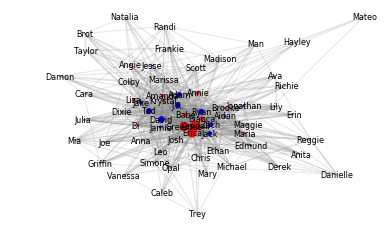

In [23]:
get_love_network("All My Childen")

In [24]:
#the version that only returns degree, without drawing the picture
def get_love_network0(showname):
    love_network = nx.Graph()
    rolelist=list(namedf[namedf['show']==showname]['name'])
    loveedge=newlovedf1[newlovedf1['show']==showname]
    for i in rolelist:
        occupation=namedf.loc[(namedf.show==showname)&(namedf.name==i),'new occupation code'].values[0]
        occupationcolor=occupationdict[occupation]
        gender=namedf.loc[(namedf.show==showname)&(namedf.name==i),'gender'].values[0]
        gendercolor=genderdict[gender]
        importance=len(sodf.loc[(sodf.show==showname)&(sodf.speaker==i)])+len(sodf.loc[(sodf.show==showname)&(sodf.listener==i)])
        love_network.add_node(i, occupation=occupation, gender=gender,occupationcolor=occupationcolor,gendercolor=gendercolor,importance=importance)
    for r in range(0,len(loveedge)):
        row0=loveedge.iloc[r]
        speaker=row0['speaker']
        listener=row0['listener']
        if  speaker != listener and speaker in love_network.nodes() and listener in love_network.nodes() :
            if (speaker,listener) not in love_network.edges():
                love_network.add_edge(speaker, listener, weight=0)
            if (speaker,listener) in love_network.edges():
                love_network.edges[(speaker, listener)]['weight'] += 1
    dcentralities = nx.degree_centrality(love_network)
    pos = nx.layout.spring_layout(love_network)
    nodecolor=[love_network.nodes()[x]['occupationcolor'] for x in love_network.nodes()]
    dcentrality=[dcentralities[x] for x in love_network.nodes()]
    edges,weights = zip(*nx.get_edge_attributes(love_network,'weight').items())
    weightlist=[x for x in weights]
    importance0=[love_network.nodes()[x]['importance'] for x in love_network.nodes()]
    loverate=[dcentrality[x]/importance0[x] for x in range(0,len(importance0))]
    lovedegree=list()
    normalizedlovedegree=list()
    for j in rolelist:
        lovedegree.append(dcentralities[j])
        normalizedlovedegree.append(dcentralities[j]/np.max(dcentrality))
    result=pd.DataFrame({'show':[showname]*len(lovedegree),'name':list(love_network.nodes()),'lovedegree':lovedegree,'normalizeddegree':normalizedlovedegree,'wholelines':importance0,'loverate':loverate})
    return result

In [ ]:
def get_love_edges(showname):
    love_network = nx.Graph()
    rolelist=list(namedf[namedf['show']==showname]['name'])
    loveedge=newlovedf1[newlovedf1['show']==showname]
    for i in rolelist:
        occupation=namedf.loc[(namedf.show==showname)&(namedf.name==i),'new occupation code'].values[0]
        occupationcolor=occupationdict[occupation]
        gender=namedf.loc[(namedf.show==showname)&(namedf.name==i),'gender'].values[0]
        gendercolor=genderdict[gender]
        importance=len(sodf.loc[(sodf.show==showname)&(sodf.speaker==i)])+len(sodf.loc[(sodf.show==showname)&(sodf.listener==i)])
        love_network.add_node(i, occupation=occupation, gender=gender,occupationcolor=occupationcolor,gendercolor=gendercolor,importance=importance)
    for r in range(0,len(loveedge)):
        row0=loveedge.iloc[r]
        speaker=row0['speaker']
        listener=row0['listener']
        if  speaker != listener and speaker in love_network.nodes() and listener in love_network.nodes() :
            if (speaker,listener) not in love_network.edges():
                love_network.add_edge(speaker, listener, weight=0)
            if (speaker,listener) in love_network.edges():
                love_network.edges[(speaker, listener)]['weight'] += 1
    matrix=[0]*9
    for tt in love_network.edges():
        sender=tt[0]
        receiver=tt[1]
        so=namedf.loc[(namedf.show==showname)&(namedf.name==sender),'new occupation code'].values[0]
        ro=namedf.loc[(namedf.show==showname)&(namedf.name==receiver),'new occupation code'].values[0]
        if so==1 and ro==1:
            matrix[0]=matrix[0]+1
        elif so==1 and ro==3:
            matrix[1]=matrix[1]+1
        elif so==1 and ro==5:
            matrix[2]=matrix[2]+1
        elif so==3 and ro==1:
            matrix[3]=matrix[3]+1
        elif so==3 and ro==3:
            matrix[4]=matrix[4]+1
        elif so==3 and ro==5:
            matrix[5]=matrix[5]+1
        elif so==5 and ro==1:
            matrix[6]=matrix[6]+1
        elif so==5 and ro==3:
            matrix[7]=matrix[7]+1
        elif so==5 and ro==5:
            matrix[8]=matrix[8]+1
    return matrix

wholematrix=[0]*9
for i in set(list(namedf['show'])):
    matrix=get_love_edges(i)
    print(i)
    wholematrix=wholematrix+matrix

In [95]:
wholematrix=wholematrix[9:]
result=[0]*9
for i in range(0,len(wholematrix)):
    place=i%9
    result[place]=result[place]+wholematrix[i]
result

[2667, 478, 865, 391, 79, 150, 702, 131, 317]

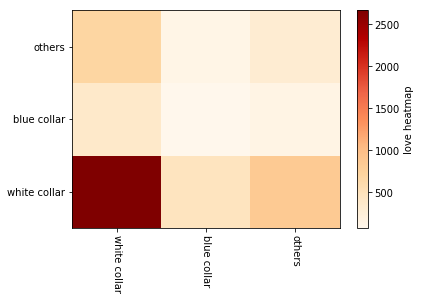

In [17]:
heatmapMatrixC=np.array([[2667,478,865],[391,79,150],[702,131,317]])
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC,cmap='OrRd')
cbar = plt.colorbar(hmap)
cbar.set_label('love heatmap')
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)
a = ax.set_xticklabels(['white collar','blue collar','others'], minor=False,rotation=270)
a = ax.set_yticklabels(['white collar','blue collar','others'], minor=False)
plt.show()

In [26]:
def get_love_edges_gender(showname):
    love_network = nx.Graph()
    rolelist=list(namedf[namedf['show']==showname]['name'])
    loveedge=newlovedf1[newlovedf1['show']==showname]
    for i in rolelist:
        occupation=namedf.loc[(namedf.show==showname)&(namedf.name==i),'new occupation code'].values[0]
        occupationcolor=occupationdict[occupation]
        gender=namedf.loc[(namedf.show==showname)&(namedf.name==i),'gender'].values[0]
        gendercolor=genderdict[gender]
        importance=len(sodf.loc[(sodf.show==showname)&(sodf.speaker==i)])+len(sodf.loc[(sodf.show==showname)&(sodf.listener==i)])
        love_network.add_node(i, occupation=occupation, gender=gender,occupationcolor=occupationcolor,gendercolor=gendercolor,importance=importance)
    for r in range(0,len(loveedge)):
        row0=loveedge.iloc[r]
        speaker=row0['speaker']
        listener=row0['listener']
        if  speaker != listener and speaker in love_network.nodes() and listener in love_network.nodes() :
            if (speaker,listener) not in love_network.edges():
                love_network.add_edge(speaker, listener, weight=0)
            if (speaker,listener) in love_network.edges():
                love_network.edges[(speaker, listener)]['weight'] += 1
    matrix=[0]*4
    for tt in love_network.edges():
        sender=tt[0]
        receiver=tt[1]
        so=namedf.loc[(namedf.show==showname)&(namedf.name==sender),'gender'].values[0]
        ro=namedf.loc[(namedf.show==showname)&(namedf.name==receiver),'gender'].values[0]
        if so=='male' and ro=='male':
            matrix[0]=matrix[0]+1
        elif so=='male' and ro=='female':
            matrix[1]=matrix[1]+1
        elif so=='female' and ro=='male':
            matrix[2]=matrix[2]+1
        elif so=='female' and ro=='female':
            matrix[3]=matrix[3]+1
    return matrix

wholematrix=[]
for i in set(list(namedf['show'])):
    matrix=get_love_edges(i)
    print(i)
    wholematrix=wholematrix+matrix

Bold and Beautiful
Passions
General Hospital
One Life to Live
Port Charles
Guiding Light
As the World Turns
Days of Our Lives
Young and Restless
All My Childen


In [79]:
result=[0,0,0,0]
for i in range(0,len(wholematrix)):
    t=i%4
    result[t]=result[t]+wholematrix[i]
result

[1320, 1670, 1320, 1470]

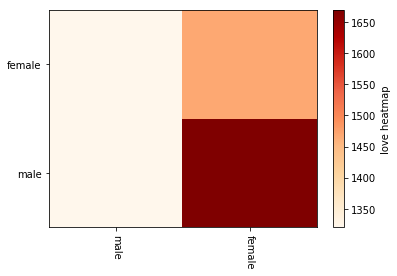

In [81]:
heatmapMatrixC=np.array([[1320,1670],[1320,1470]])
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC,cmap='OrRd')
cbar = plt.colorbar(hmap)
cbar.set_label('love heatmap')
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)
a = ax.set_xticklabels(['male','female'], minor=False,rotation=270)
a = ax.set_yticklabels(['male','female'], minor=False)
plt.show()

In [32]:
def getwords(i):
    df0=newlovedf1[newlovedf1['show']==i]
    rolelist=list(namedf[namedf['show']==i]['name'])
    occupationlist=[]
    for j in rolelist:
        occupation=namedf.loc[(namedf.show==i)&(namedf.name==j),'occupation code'].values[0]
        occupationlist.append(occupation)
    upper=[rolelist[x] for x in range(0,len(rolelist)) if occupationlist[x]<3]
    lower=[rolelist[x] for x in range(0,len(rolelist)) if occupationlist[x]>2 and occupationlist[x]<5]
    other=[rolelist[x] for x in range(0,len(rolelist)) if occupationlist[x]==5]
    uppertoupper=str()
    uppertolower=str()
    uppertoother=str()
    lowertoupper=str()
    lowertoother=str()
    lowertolower=str()
    othertoupper=str()
    othertoother=str()
    othertolower=str()
    for t in range(0,len(df0)):
        therow=df0.iloc[t]
        speaker=therow['speaker']
        listener=therow['listener']
        if speaker in upper and listener in upper:
            uppertoupper=uppertoupper+' '+therow['words']
        elif speaker in upper and listener in other:
            uppertoother=uppertoother+' '+therow['words']
        elif speaker in upper and listener in lower:
            uppertolower=uppertolower+' '+therow['words']
        elif speaker in other and listener in upper:
            othertoupper=othertoupper+' '+therow['words']
        elif speaker in other and listener in other:
            othertoother=othertoother+' '+therow['words']
        elif speaker in other and listener in lower:
            othertolower=othertolower+' '+therow['words']
        elif speaker in lower and listener in upper:
            lowertoupper=lowertoupper+' '+therow['words']
        elif speaker in lower and listener in other:
            lowertoother=lowertoother+' '+therow['words']
        elif speaker in lower and listener in lower:
            lowertolower=lowertolower+' '+therow['words']
    return uppertoupper, uppertolower, uppertoother, lowertoupper, lowertoother, lowertolower, othertoupper, othertoother, othertolower

In [33]:
wordlist=getwords('Port Charles')

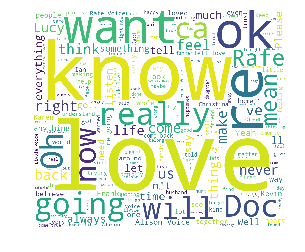

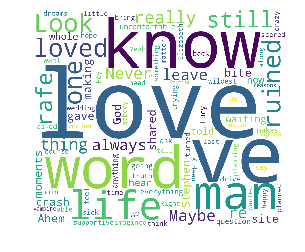

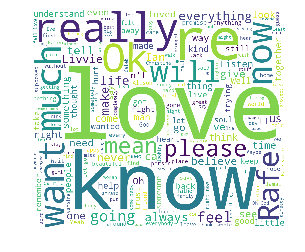

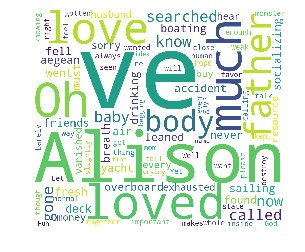

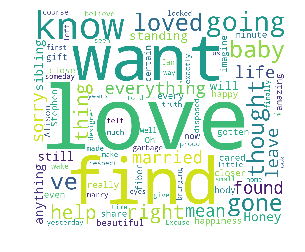

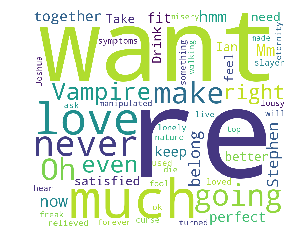

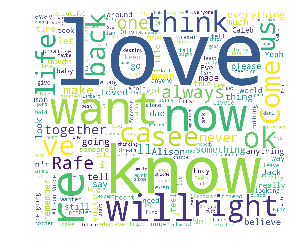

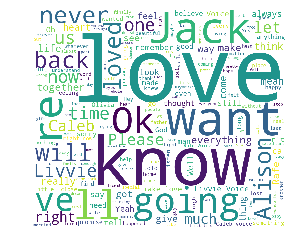

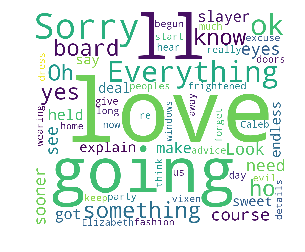

In [36]:
from wordcloud import WordCloud
for i in range(0,9):
    wordcloud = WordCloud(background_color="white",width=1000, height=860, margin=2).generate(wordlist[i])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
#Here is the codes for the semantic networks

In [34]:
textframe=pd.read_excel("textframe.xlsx",Sheet='sheet1')
textframe['normlized']=textframe['words'].apply(lambda x: lucem_illud_2020.normalizeTokens(lucem_illud_2020.word_tokenize(x.lower())))

In [35]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g
    
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized

In [308]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]
soapTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.6,min_df=1,max_features=10000000,norm='l2')
soapTFVects = soapTFVectorizer.fit_transform(textframe['words'])
leavingwords=list(soapTFVectorizer.vocabulary_.keys())+['love']
for t in namedf['name']:
    try:
        leavingwords.remove(t.lower())
    except:
        continue

In [309]:
textframe['reduced_tokens'] = textframe['normlized'].apply(lambda x: dropMissing(x, leavingwords))

Name: 
Type: Graph
Number of nodes: 25
Number of edges: 300
Average degree:  24.0000


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


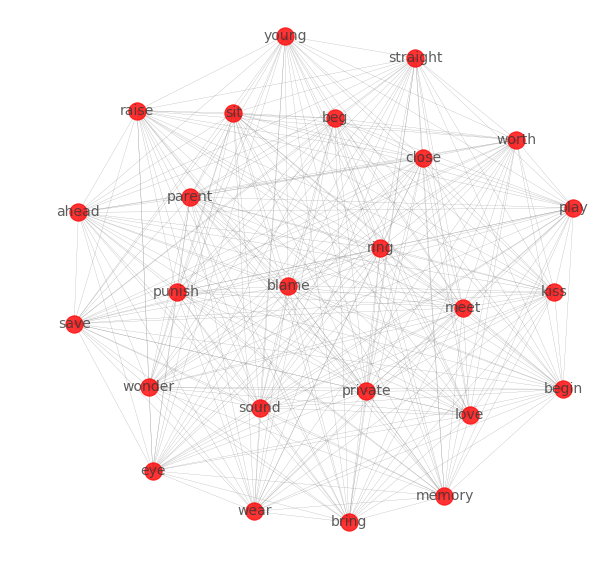

In [313]:
Vectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
Vects_incidence = Vectorizer.fit_transform(textframe['reduced_tokens'][0:3].apply(lambda x: ' '.join(x)))
g_2mode = nx.Graph()
g_2mode.add_nodes_from((Vectorizer.get_feature_names()[i] for i in range(Vects_incidence.shape[1])), bipartite = 'word')
for i in range(0,Vects_incidence.shape[0]):
    g_2mode.add_node(i, bipartite = 'doc',cate=list(textframe['cate'])[i])
g_2mode.add_edges_from(((d, Vectorizer.get_feature_names()[w], {'weight' :Vects_incidence[d, w]}) for d, w in zip(*Vects_incidence.nonzero())))
gWord = contractNetwork(g_2mode, 'word')
gWord.remove_edges_from([(n1, n2) for n1, n2, d in gWord.edges(data = True) if d['weight'] <=2])
gWord.remove_nodes_from(list(nx.isolates(gWord))) 
pNeighbors = gWord.neighbors('love')
pNeighborsPlus1 = set(pNeighbors)
for n in pNeighbors:
    pNeighborsPlus1 |= set(gWord.neighbors(n))
pNeighborsPlus1.add('love')
g_s= gWord.subgraph(set(gWord.neighbors('love')).add('love'))
#g_s= gWord.subgraph(pNeighborsPlus1)
print(nx.info(g_s))
layout_amer = nx.spring_layout(g_s)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_s.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_s.edges(data = True)))
nx.draw(g_s, ax = ax, pos = layout_amer, labels = {n:n for n in g_s.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_s.edges(data = True)], 
        alpha = .8, 
        font_size = 14,
        font_color = 'xkcd:dark grey',
        edge_color = 'grey',
        cmap = plt.get_cmap('plasma')) 
one=list(g_s.nodes())

In [ ]:
# two and three are obtained similarly by changing the codes above

In [315]:
#get unique words from one, two and three
oneunique=[x for x in one if x not in two and x not in three]
twounique=[x for x in two if x not in one and x not in three]
threeunique=[x for x in three if x not in one and x not in two]

In [316]:
oneunique

['ahead',
 'beg',
 'begin',
 'close',
 'kiss',
 'parent',
 'private',
 'punish',
 'raise',
 'ring',
 'save',
 'straight',
 'wear',
 'wonder',
 'worth',
 'young']

In [317]:
twounique

['appreciate',
 'easy',
 'excuse',
 'free',
 'handle',
 'happiness',
 'honest',
 'imagine',
 'narrative',
 'order',
 'plan',
 'problem',
 'proud',
 'ruin',
 'send',
 'share',
 'sign',
 'suffer',
 'tear',
 'tough',
 'uh']

In [318]:
threeunique

['arm',
 'buy',
 'catch',
 'choose',
 'confuse',
 'couple',
 'decide',
 'dinner',
 'favorite',
 'freak',
 'ha',
 'hang',
 'hot',
 'involve',
 'lock',
 'pull',
 'push',
 'relationship',
 'school',
 'scream',
 'sexy',
 'support',
 'suppose',
 'tomorrow']